In [1]:
from matplotlib import pyplot as plt
from pprint import pprint
import numpy as np

dataName = '180710_HAECs_NoFlow_HAEC2\sample1'
dataName = 'test_data'

dataOrganization = 'Culture_16bits'
codebook = 'HAEC1E1'

from merlin.core import dataset
from merlin.core import executor
from merlin.core import scheduler

import json

dSet = dataset.MERFISHDataSet(
        dataName, 
        dataOrganizationName=dataOrganization,
        codebookName=codebook)

e = executor.LocalExecutor()

with open('test_analysis_parameters.json', 'r') as f:
    s = scheduler.Scheduler(dSet, e, json.load(f))

C:\Users\George\Anaconda352\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
taskNames = list(s.analysisTasks.keys())
pprint(taskNames)
s.analysisTasks['SegmentCells'].get_dependencies()

['FiducialCorrelationWarp',
 'DeconvolutionPreprocess',
 'Optimize',
 'Decode',
 'SimpleGlobalAlignment',
 'GenerateMosaic',
 'PlotPerformance',
 'FilterBarcodes',
 'SegmentCells']


['FiducialCorrelationWarp', 'SimpleGlobalAlignment']

In [8]:
b = s.analysisTasks['FiducialCorrelationWarp'].run()
b = s.analysisTasks['SimpleGlobalAlignment'].run()


AnalysisAlreadyStartedException: 

In [9]:
b = s.analysisTasks['SegmentCells'].run()
b = s.analysisTasks['SegmentCells'].get_cell_boundaries()
len(b)

134

In [14]:
def plot_boundary(c):
    plt.plot([x[0] for x in c], [x[1] for x in c])
    
from shapely import geometry
import rtree

cellPolygons = [geometry.Polygon(x) for x in b]

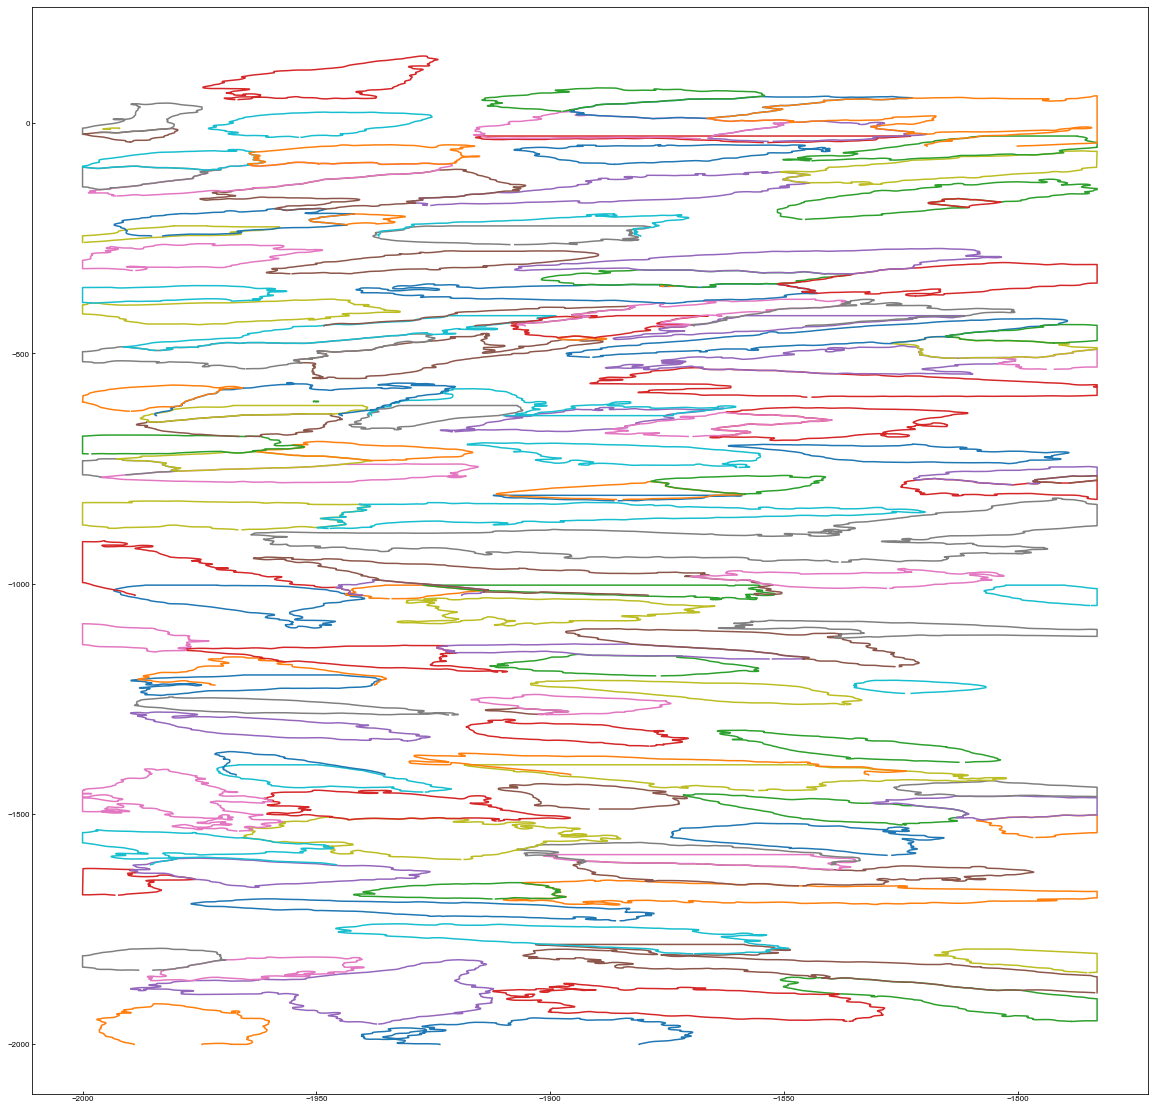

In [11]:
plt.figure(figsize=(20,20))
p = [plot_boundary(x) for x in b]

In [29]:
polygonIndex = rtree.index.Index()

for i,cell in enumerate(cellPolygons):
    print(polygonIndex.intersection(cell.bounds).area)
    
    polygonIndex.insert(i, cell.bounds)

    

AttributeError: 'generator' object has no attribute 'area'

In [25]:
dir(polygonIndex)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_create_idx_from_stream',
 '_get_ids',
 '_get_objects',
 '_intersection_obj',
 '_nearest_obj',
 '_serialize',
 'add',
 'bounds',
 'clearBuffer',
 'close',
 'count',
 'deinterleave',
 'delete',
 'dumps',
 'get_bounds',
 'get_coordinate_pointers',
 'handle',
 'insert',
 'interleave',
 'interleaved',
 'intersection',
 'leaves',
 'loads',
 'nearest',
 'properties',
 'valid']

In [ ]:
tc = [cv2.transform(x, s.analysisTasks['SimpleGlobalAlignment'].fov_to_global_transform(10))[0,:,:2] for x in c]

In [ ]:
dSet.get_fovs()

In [ ]:
[plot_boundary(x) for x in tc]

In [ ]:
t[0].dtype

In [ ]:
np.empty((0,), dtype='O')

In [ ]:
b[1]

In [ ]:
dSet.load_analysis_result('cell_boundaries', 'SegmentCells', resultIndex=0).dtype